<a href="https://colab.research.google.com/github/VicenteSorianoAguilar/MPA-MLF/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
#print(iris.feature_names)
#print(iris.data[:,:])
print(iris.target)
#print(iris.data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [55]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test)

(150, 4)
(135, 4)
(15, 4)
(135,)
(15,)
[2 1 1 1 0 0 0 1 1 0 2 1 0 2 1]


Use a Support Vector Machine for classification:


In [56]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
#print(SVMmodel.get_params())
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [57]:
# select only the first two features
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

# Keep only classes 0 and 1
X, y = X[y < 2], y[y < 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train SVM with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# accuracy
print("Model accuracy:", svm_model.score(X_test, y_test))



Model accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

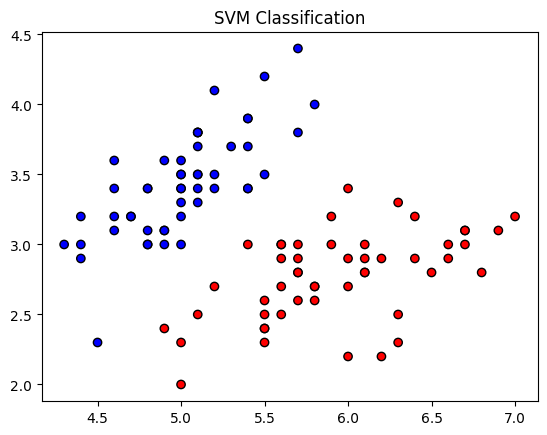

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("SVM Classification")
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [62]:
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
SVMmodel_1=SVC(kernel='linear', C=200)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel_1.fit(X_train_1,y_train_1)
print(SVMmodel_1.get_params ())
SVMmodel_1.score(X_test_1,y_test_1)


(100, 2)
{'C': 200, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


0.95

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

In [71]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(x1,x2,color='black')


[[-0.04601304  0.5214808  -1.00270033 -0.46396459]
 [-0.00681867  0.17880294 -0.5386236  -0.29198259]
 [ 0.63023302  1.10114873 -2.0555122  -1.94229155]]
[1.45004377 1.50651314 6.18857357]


ValueError: operands could not be broadcast together with shapes (3,) (100,) 

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

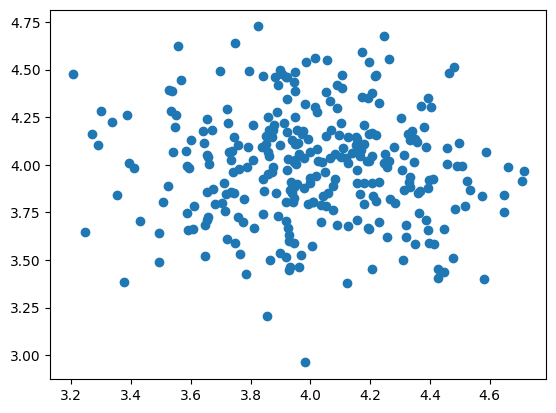

In [66]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

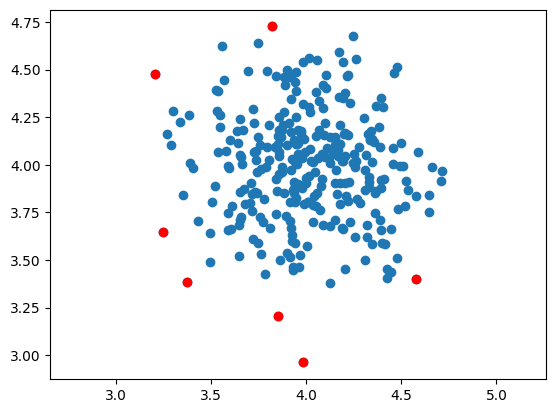

In [67]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

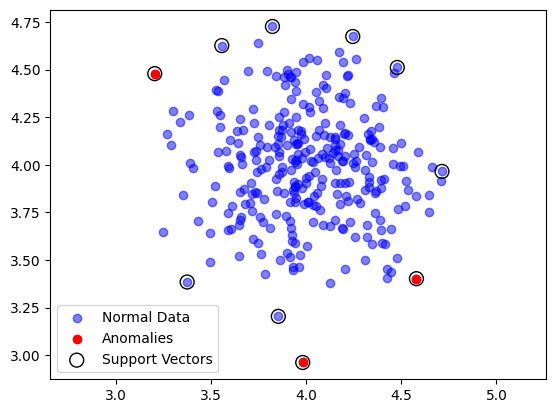

In [69]:
supvectors = SVMmodelOne.support_vectors_ # Get support vectors
plt.scatter(x[:, 0], x[:, 1], color='blue', alpha=0.5, label="Normal Data")# Plot data points

plt.scatter(values[:, 0], values[:, 1], color='red', label="Anomalies") # Plot outliers
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors") # Plot support vectors

plt.axis('equal')
plt.legend()
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

Threshold for outliers: 8.989098620408397


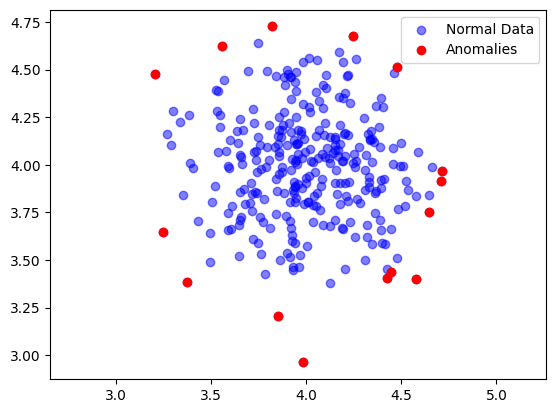

In [75]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)# Set threshold at 5% quantile
print("Threshold for outliers:", thresh)

# Identify points with scores
index = where(scores <= thresh)
values = x[index]
plt.scatter(x[:, 0], x[:, 1], color='blue', alpha=0.5, label="Normal Data")
plt.scatter(values[:, 0], values[:, 1], color='red', label="Anomalies")

plt.axis('equal')
plt.legend()
plt.show()
